# Exp 2: Image Intensity Transformations and Spatial Filtering #
## 1.	Aims ##

#### 1. Learn the method of contrast adjustment and histogram equalization.

#### 2. Learn how to display histograms of images.
    
#### 3. Learn how to perform spatial filtering.

## 2.	Steps and Requirements

### (1) Perform Contrast Adjustment.	
(a) Load the image 'beans.png'. 

(b) Stretch its graysacle to the range of [0,1]. (Tips: ``skimage.exposure.rescale_intensity``) 

(c) Shrink its grayscale to the range of [0.2,0.8]. (Tips: ``skimage.exposure.rescale_intensity``) 

(d) Obtain the negative image. (Tips: ``skimage.exposure.rescale_intensity``) 

(e) Perform log transformation. (Tips: ``skimage.exposure.adjust_log``)  

(f) Perform Gamma transformation with $\gamma=0.5$ and $\gamma=1.5$, respectively. (Tips: ``skimage.exposure.adjust_gamma``) 

Display the images with suitable titles. 

D:\Anaconda\anaconda2021\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


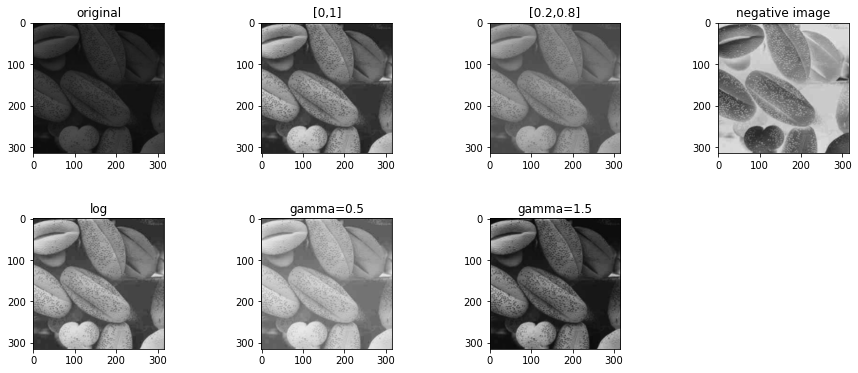

In [1]:
#load some necessary libraries
from skimage import io
import skimage.exposure
import cv2
import skimage
import matplotlib.pyplot as plt
from skimage import util
from PIL import ImageFilter,Image

#load the image 'beans.png'
beans=io.imread('./images/beans.png')

#if we want to reduce the output, we can comment out all the print codeline
#first we can print the beans to see the range of the image
#print('The original image:\n',beans)

#from the source code on github we can find something detailed:
#skimage.exposure.rescale_intensity(image, in_range='image', out_range='dtype')
# If the min/max value of `in_range` is more/less than the min/max image intensity, then the intensity levels are clipped
#If the input image is constant, the output will be clipped directly to the output range

#main process:
#image = np.clip(image, imin, imax)
#if imin != imax:
    #image = (image - imin) / (imax - imin)
    #return (image * (omax - omin) + omin).astype(out_dtype)
#else:
    #return np.clip(image, omin, omax).astype(out_dtype)

#stretch its grayscale to the range of [0,1]
stretch_beans=skimage.exposure.rescale_intensity(beans,out_range=(0,1))
#we can print the image after its grayscale being stretched to further ensure our process
#print('The image after its grayscale being stretched:\n',stretch_beans)

#shrink its grayscale to the range of [0.2,0.8]
shrink_beans=skimage.exposure.rescale_intensity(beans,out_range=(0.2,0.8))
#we can print the image after its grayscale being shrunk to further ensure our process
#print('The image after its grayscale being shunk:\n',shrink_beans)

#obtain the negative image
negative_stretch_beans=skimage.exposure.rescale_intensity(stretch_beans,out_range=(1,0))
#print the result image
#print('obtain the negative image:\n',negative_stretch_beans)

#from the source code on github we can find something detailed:
#skimage.exposure.adjust_log(image, gain=1, inv=False)
#This function transforms the input image pixelwise according to the equation ``O = gain*log(1 + I)`` after scaling each pixel to the range 0 to 1. For inverse logarithmic correction, the equation is ``O = gain*(2**I - 1)``.
# gain : float, optional. The constant multiplier. Default value is 1.
#inv : float, optional. If True, it performs inverse logarithmic correction,else correction will be logarithmic. Defaults to False.

#main process:
#if inv:
    #out = (2 ** (image / scale) - 1) * scale * gain
    #return dtype(out)

#out = np.log2(1 + image / scale) * scale * gain
#return out.astype(dtype)

#perform log transformation
#The input image is the image range from 0 to 1
beans_log=skimage.exposure.adjust_log(stretch_beans)
#print the result image
#print('The image after performing log transformation:\n',beans_log)

#from the source code on github we can find something detailed:
#skimage.exposure.adjust_gamma(image, gamma=1, gain=1)
#This function transforms the input image pixelwise according to the equation ``O = I**gamma`` after scaling each pixel to the range 0 to 1.

#main process:
#out = (((image / scale) ** gamma) * scale * gain).astype(dtype)

#perform Gamma transformation with gamma=0.5
#The input image is the image range from 0 to 1
beans_gamma_1=skimage.exposure.adjust_gamma(stretch_beans,gamma=0.5)
#print the result image
#print('The image after performing gamma transformation with gamma=0.5:\n',beans_gamma_1)

#perform Gamma transformation with gamma=1.5
#The input image is the image range from 0 to 1
beans_gamma_2=skimage.exposure.adjust_gamma(stretch_beans,gamma=1.5)
#print the result image
#print('The image after performing gamma transformation with gamma=1.5:\n',beans_gamma_2)

#display the images with suitable titles
#adjust the interval of subplots
plt.figure(figsize=(15,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
#display the original image
subplot=plt.subplot(2,4,1)
subplot.set_title('original')
plt.imshow(beans)
#display the stretched image
subplot=plt.subplot(2,4,2)
subplot.set_title('[0,1]')
plt.imshow(stretch_beans)
#display the shrunk image
subplot=plt.subplot(2,4,3)
subplot.set_title('[0.2,0.8]')
plt.imshow(shrink_beans)
#display the negative image
subplot=plt.subplot(2,4,4)
subplot.set_title('negative image')
plt.imshow(negative_stretch_beans)
#display the image after log transformation
subplot=plt.subplot(2,4,5)
subplot.set_title('log')
plt.imshow(beans_log)
#display the image after Gamma transformation with gamma=0.5
subplot=plt.subplot(2,4,6)
subplot.set_title('gamma=0.5')
plt.imshow(beans_gamma_1)
##display the image after Gamma transformation with gamma=1.5
subplot=plt.subplot(2,4,7)
subplot.set_title('gamma=1.5')
plt.imshow(beans_gamma_2)

### (2) Compute and Display Image Histogram.	
(a) Compute the histogram of the original image and the histograms of the adjusted images above.
(<font style="color:red;"> Tips:``Matplotlib.pyplot.hist``or ``skimage.exposure.histogram(image, nbins=256)``</font>) 

(b) Display the histogram of the original image and the histograms of the adjusted images above. Use a suitlabe title for each figure.


<BarContainer object of 256 artists>

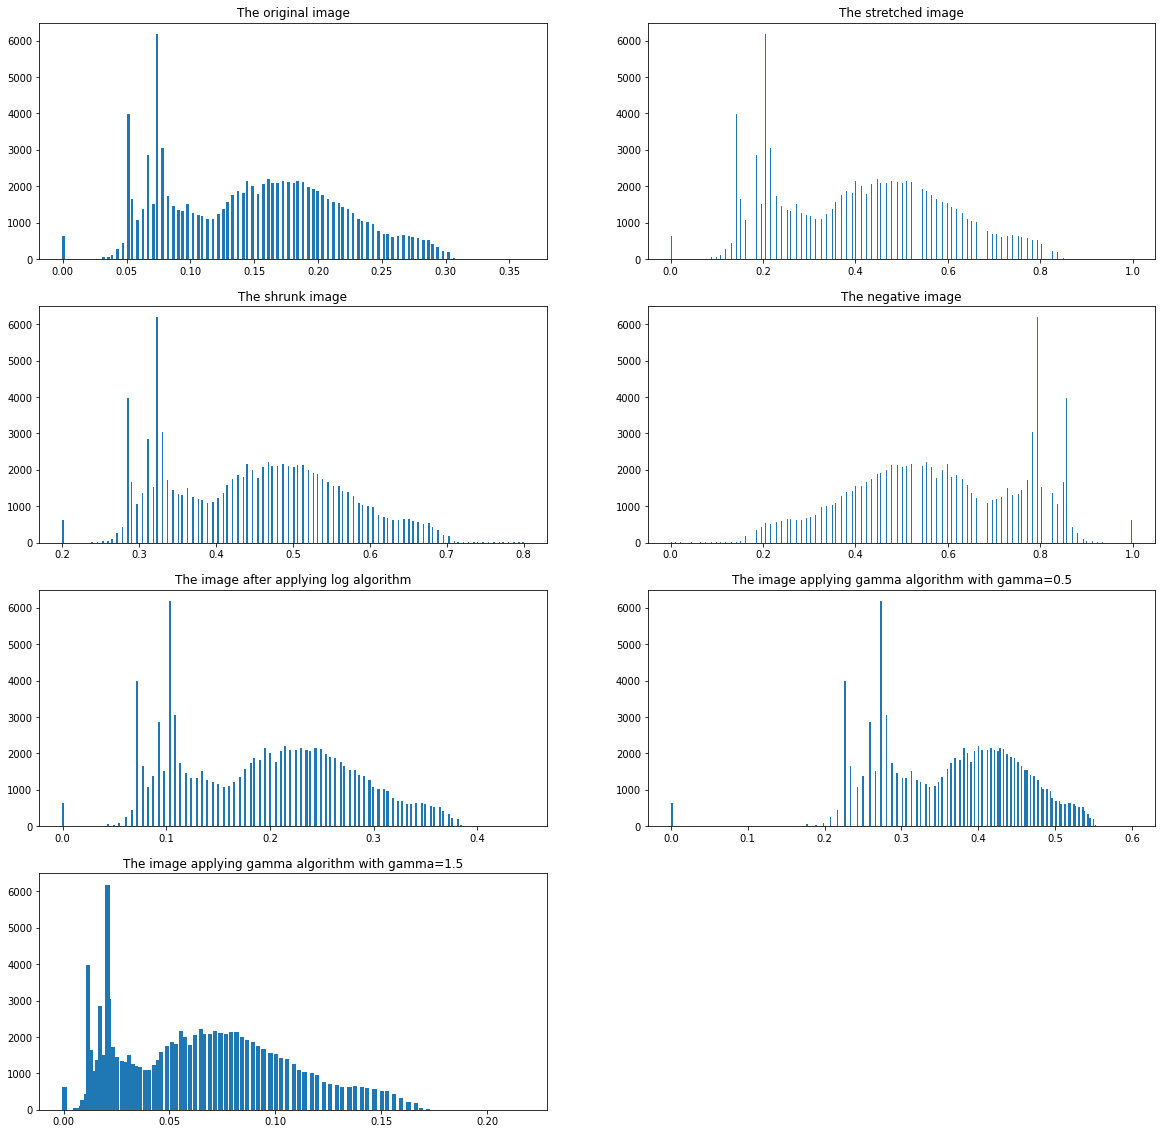

In [2]:
#!pip install opencv-python
import cv2
import numpy as np

#load the image
beans=io.imread('./images/beans.png')
#convert the image into a grayscale image
beans=skimage.color.rgb2gray(beans)

#from github we can find more detaied information:
#skimage.exposure.histogram(image, nbins=256, source_range='image', normalize=False, *,channel_axis=None):
#return histogram of image
#If `channel_axis` is not set, the histogram is computed on the flattened image. For color or multichannel images, set ``channel_axis`` to use a common binning for all channels.
#Alternatively, one may apply the function separately on each channel to obtain a histogram for each color channel with separate binning.
#normalize : bool, optional. If True, normalize the histogram by the sum of its values.
#channel_axis : int or None, optional. If None, the image is assumed to be a grayscale (single channel) image.Otherwise, this parameter indicates which axis of the array corresponds to channels.
#the main process:
#if channel_axis is not None:
    #channels = sh[-1]
    #hist = []
    # compute bins based on the raveled array
    #if np.issubdtype(image.dtype, np.integer):
        # here bins corresponds to the bin centers
        #bins = _bincount_histogram_centers(image, source_range)
    #else:
        # determine the bin edges for np.histogram
        #hist_range = _get_numpy_hist_range(image, source_range)
        #bins = _get_bin_edges(image, nbins, hist_range)
    #for chan in range(channels):
        #h, bc = _histogram(image[..., chan], bins, source_range, normalize)
        #hist.append(h)
    # Convert to numpy arrays
    #bin_centers = np.asarray(bc)
    #hist = np.stack(hist, axis=0)
#else:
    #hist, bin_centers = _histogram(image, nbins, source_range, normalize)
#return hist, bin_centers

#Compute the histogram of the original image
original_histogram,original_bincenters=skimage.exposure.histogram(beans,nbins=256)

#stretch its grayscale to the range of [0,1]
stretch_beans=skimage.exposure.rescale_intensity(beans,in_range='image',out_range=(0,1))
#Compute the histogram of the stretched image
stretch_histogram,stretch_bincenters=skimage.exposure.histogram(stretch_beans,nbins=256)

#shrink its grayscale to the range of [0.2,0.8]
shrink_beans=skimage.exposure.rescale_intensity(beans,in_range='image',out_range=(0.2,0.8))
#Compute the histogram of the shrunk image
shrink_histogram,shrink_bincenters=skimage.exposure.histogram(shrink_beans,nbins=256)

#obtain the negative image
negative_stretch_beans=skimage.exposure.rescale_intensity(beans,in_range='image',out_range=(1,0))
#Compute the histogram of the negative image
negative_histogram,negative_bincenters=skimage.exposure.histogram(negative_stretch_beans,nbins=256)

#perform log transformation
#The input image is the image range from 0 to 1
beans_log=skimage.exposure.adjust_log(beans)
#Compute the histogram of the log image
log_histogram,log_bincenters=skimage.exposure.histogram(beans_log,nbins=256)

#perform Gamma transformation with gamma=0.5
#The input image is the image range from 0 to 1
beans_gamma_1=skimage.exposure.adjust_gamma(beans,gamma=0.5)
#Compute the histogram of the gamma image with gamma=0.5
gamma1_histogram,gamma1_bincenters=skimage.exposure.histogram(beans_gamma_1,nbins=256)

#perform Gamma transformation with gamma=1.5
#The input image is the image range from 0 to 1
beans_gamma_2=skimage.exposure.adjust_gamma(beans,gamma=1.5)
#Compute the histogram of the gamma image with gamma=1.5
gamma2_histogram,gamma2_bincenters=skimage.exposure.histogram(beans_gamma_2,nbins=256)

#set a figure
plt.figure(figsize=(20,20))

#set subplot with titles, display the histogram
subplot=plt.subplot(4,2,1)
subplot.set_title('The original image')
plt.bar(original_bincenters, original_histogram, width=0.002)

subplot=plt.subplot(4,2,2)
subplot.set_title('The stretched image')
plt.bar(stretch_bincenters, stretch_histogram, width=0.002)

subplot=plt.subplot(4,2,3)
subplot.set_title('The shrunk image')
plt.bar(shrink_bincenters, shrink_histogram, width=0.002)

subplot=plt.subplot(4,2,4)
subplot.set_title('The negative image')
plt.bar(negative_bincenters, negative_histogram, width=0.002)

subplot=plt.subplot(4,2,5)
subplot.set_title('The image after applying log algorithm')
plt.bar(log_bincenters, log_histogram, width=0.002)

subplot=plt.subplot(4,2,6)
subplot.set_title('The image applying gamma algorithm with gamma=0.5')
plt.bar(gamma1_bincenters, gamma1_histogram, width=0.002)

subplot=plt.subplot(4,2,7)
subplot.set_title('The image applying gamma algorithm with gamma=1.5')
plt.bar(gamma2_bincenters, gamma2_histogram, width=0.002)

### (3) Image Histogram Equalization 	
(a) Load the image 'beans.png'.  

(b) Perform histogram equalization of the image. (Tips: ``skimage.exposure.equalize_hist``) 

(c) Display the original image, the equalized image, the histogram of the original image, and the equalized image.  

(d) Answer the question: What are their differences?


"\n1.Analysis from the image: Contrast enhancement of the image from the visual effect,and the grayscale range in the image is wider.\n\n2.From histogram analysis: It is obvious that the range of x-axis which is the gray scale of the image becomes large after equalized.\nAnd the histogram looks sparser which means that the gray scale values are more dispersed.\nHowever, the height trendency of the histogram isn't change which means the distribution of the grayscale is not changed.\nIt is just to expand the values' distribution space in the x-axis.\n"

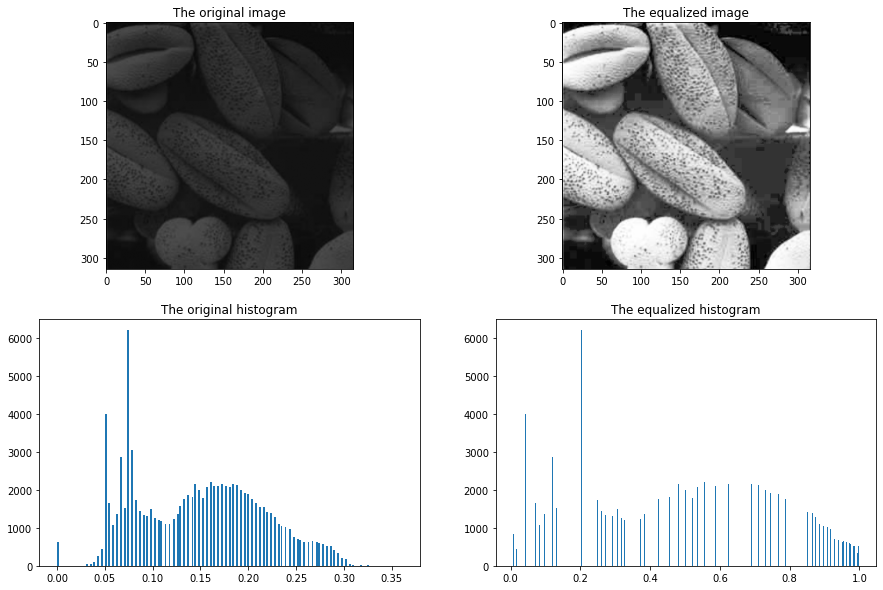

In [3]:
#load the image 'beans.png'
beans=io.imread('./images/beans.png')
#convert the image into a grayscale image
beans=skimage.color.rgb2gray(beans)

#from github we can find more details:
#equalize_hist(image, nbins=256, mask=None):
#the main process:
#if mask is not None:
    #mask = np.array(mask, dtype=bool)
    #cdf, bin_centers = cumulative_distribution(image[mask], nbins)
#else:
    #cdf, bin_centers = cumulative_distribution(image, nbins)
#out = np.interp(image.flat, bin_centers, cdf)
#out = out.reshape(image.shape)
#return out.astype(utils._supported_float_type(image.dtype), copy=False)

#the main process of cumulative_distribution(image, nbins=256):
# hist, bin_centers = histogram(image, nbins)
#img_cdf = hist.cumsum()
#img_cdf = img_cdf / float(img_cdf[-1])
#cdf_dtype = utils._supported_float_type(image.dtype)
#img_cdf = img_cdf.astype(cdf_dtype, copy=False)
#return img_cdf, bin_centers

#perform histogram equalization of the image
beans_equalized=skimage.exposure.equalize_hist(beans)

#Compute the histogram of the original image
original_histogram,original_bincenters=skimage.exposure.histogram(beans,nbins=256)
#Compute the histogram of the equalized image
equalized_histogram,equalizedl_bincenters=skimage.exposure.histogram(beans_equalized,nbins=256)

#change images back to rgb format
beans=skimage.color.gray2rgb(beans)
beans_equalized=skimage.color.gray2rgb(beans_equalized)

#display the original image, the equalized image, the histogram of the original image, and the equalized image.
plt.figure(figsize=(15,10))
subplot=plt.subplot(2,2,1)
plt.imshow(beans)
subplot.set_title('The original image')

subplot=plt.subplot(2,2,2)
plt.imshow(beans_equalized)
subplot.set_title('The equalized image')

subplot=plt.subplot(2,2,3)
subplot.set_title('The original histogram')
plt.bar(original_bincenters, original_histogram, width=0.002)

subplot=plt.subplot(2,2,4)
subplot.set_title('The equalized histogram')
plt.bar(equalizedl_bincenters, equalized_histogram, width=0.002)

#answer the question: What are their difference?
"""
1.Analysis from the image: Contrast enhancement of the image from the visual effect,and the grayscale range in the image is wider.

2.From histogram analysis: It is obvious that the range of x-axis which is the gray scale of the image becomes large after equalized.
And the histogram looks sparser which means that the gray scale values are more dispersed.
However, the height trendency of the histogram isn't change which means the distribution of the grayscale is not changed.
It is just to expand the values' distribution space in the x-axis.
"""

### (4) Smoothing Linear Filtering.	
(a) Load the image 'mandrill.jpg'. 

(b) Add salt&Pepper noise with different intensities (at least 3 kinds). (Tips: ``skimage.util.random_noise``) 

(c) Perform smoothing linear filtering to smooth these noised images respectively. (Tips: ``ImageFilter.BLUR``) 

(d) Display the images in the same figure with sub-figures. Add the corresponding title to each sub-figure.

In [4]:
from skimage import util, io, color,img_as_ubyte

#load the image 'mandrill.jpg'.
mandrill=io.imread('./images/mandrill.jpg'

#skimage.util.random_noise(image, mode='s&p', rng=None, clip=True, mean,var,local_vars,amount,salt_vs_pepper)
#Proportion of salt vs. pepper noise for ‘s&p’ on range [0, 1]. Higher values represent more salt. Default : 0.5 (equal amounts)

#add salt&Pepper noise with different intensities(at least 3 kinds)
#the realization of changes of intensities comes from using the parameter of 'amount'
salt_pepper_1=util.random_noise(mandrill,mode='s&p',amount=0.001)
salt_pepper_2=util.random_noise(mandrill,mode='s&p',amount=0.01)
salt_pepper_3=util.random_noise(mandrill,mode='s&p',amount=0.05)
salt_pepper_4=util.random_noise(mandrill,mode='s&p',amount=0.1)
salt_pepper_5=util.random_noise(mandrill,mode='s&p',amount=0.4)
salt_pepper_6=util.random_noise(mandrill,mode='s&p',amount=0.8)

#convert the float64 arrays to uint8
mandrill=skimage.img_as_ubyte(mandrill)
salt_pepper_1=skimage.img_as_ubyte(salt_pepper_1)
salt_pepper_2=skimage.img_as_ubyte(salt_pepper_2)
salt_pepper_3=skimage.img_as_ubyte(salt_pepper_3)
salt_pepper_4=skimage.img_as_ubyte(salt_pepper_4)
salt_pepper_5=skimage.img_as_ubyte(salt_pepper_5)
salt_pepper_6=skimage.img_as_ubyte(salt_pepper_6)


#perform smoothing linear filtering to smooth these noised images respectively
original_smooth=Image.fromarray(mandrill).filter(ImageFilter.BLUR)
salt_pepper_1_smooth=Image.fromarray(salt_pepper_1).filter(ImageFilter.BLUR)
salt_pepper_2_smooth=Image.fromarray(salt_pepper_2).filter(ImageFilter.BLUR)
salt_pepper_3_smooth=Image.fromarray(salt_pepper_3).filter(ImageFilter.BLUR)
salt_pepper_4_smooth=Image.fromarray(salt_pepper_4).filter(ImageFilter.BLUR)
salt_pepper_5_smooth=Image.fromarray(salt_pepper_5).filter(ImageFilter.BLUR)
salt_pepper_6_smooth=Image.fromarray(salt_pepper_6).filter(ImageFilter.BLUR)

#display the images in the same figure with sub-figures.Add the corresponding title to each sub-figure.
#set the figure
plt.figure(figsize=(25,20))

#display the original image and the noised images
subplot=plt.subplot(4,4,1)
plt.imshow(mandrill)
subplot.set_title('The original image')

subplot=plt.subplot(4,4,2)
plt.imshow(salt_pepper_1)
subplot.set_title('salt_pepper with 0.001')

subplot=plt.subplot(4,4,3)
plt.imshow(salt_pepper_2)
subplot.set_title('salt_pepper with 0.01')

subplot=plt.subplot(4,4,4)
plt.imshow(salt_pepper_3)
subplot.set_title('salt_pepper with 0.05')

subplot=plt.subplot(4,4,5)
plt.imshow(salt_pepper_4)
subplot.set_title('salt_pepper with 0.1')

subplot=plt.subplot(4,4,6)
plt.imshow(salt_pepper_5)
subplot.set_title('salt_pepper with 0.4')

subplot=plt.subplot(4,4,7)
plt.imshow(salt_pepper_6)
subplot.set_title('salt_pepper with 0.8')


#display the smoothed images
subplot=plt.subplot(4,4,9)
plt.imshow(original_smooth)
subplot.set_title('smoothed original image')

subplot=plt.subplot(4,4,10)
plt.imshow(salt_pepper_1_smooth)
subplot.set_title('smoothed image with 0.001')

subplot=plt.subplot(4,4,11)
plt.imshow(salt_pepper_2_smooth)
subplot.set_title('smoothed image with 0.01')

subplot=plt.subplot(4,4,12)
plt.imshow(salt_pepper_3_smooth)
subplot.set_title('smoothed image with 0.05')

subplot=plt.subplot(4,4,13)
plt.imshow(salt_pepper_4_smooth)
subplot.set_title('smoothed image with 0.1')

subplot=plt.subplot(4,4,14)
plt.imshow(salt_pepper_5_smooth)
subplot.set_title('smoothed image with 0.4')

subplot=plt.subplot(4,4,15)
plt.imshow(salt_pepper_6_smooth)
subplot.set_title('smoothed image with 0.8')

SyntaxError: invalid syntax (Temp/ipykernel_14508/900091855.py, line 11)

### (5) Gaussian Smoothing Filtering.	
(a) Load the image 'mandrill.jpg'. 

(b) Add Gaussian noise to image. (Tips: ``skimage.util.random_noise``) 

(c) Perform Gaussian Smoothing Filtering to smooth the noised image. Select kernels with different radius values (at least 3 kinds). (Tips: ``ImageFilter. GaussianBlur``) 

(d) Display the images in the same figure with sub-figures. Add the corresponding title to each sub-figure.

In [ ]:
#load the image 'mandrill.jpg'
mandrill=io.imread('./images/mandrill.jpg')

#add the Gaussian noise to image
mandrill_gaussian=util.random_noise(mandrill,mode='gaussian')

#convert float64 to uint8
mandrill_gaussian=skimage.img_as_ubyte(mandrill_gaussian)

#perform Gaussian noise Smoothing Filtering to smooth the noised image.Select kernels with different radius values
smoothed_image_1=Image.fromarray(mandrill_gaussian).filter(ImageFilter.GaussianBlur(radius=1))
smoothed_image_2=Image.fromarray(mandrill_gaussian).filter(ImageFilter.GaussianBlur(radius=2))
smoothed_image_3=Image.fromarray(mandrill_gaussian).filter(ImageFilter.GaussianBlur(radius=3))
smoothed_image_4=Image.fromarray(mandrill_gaussian).filter(ImageFilter.GaussianBlur(radius=4))

#display the images in the same figure with sub-figures. Add the corresponding title to each sub-figure
plt.figure(figsize=(15,10))

subplot=plt.subplot(2,2,1)
plt.imshow(smoothed_image_1)
subplot.set_title('radius=1')

subplot=plt.subplot(2,2,2)
plt.imshow(smoothed_image_2)
subplot.set_title('radius=2')

subplot=plt.subplot(2,2,3)
plt.imshow(smoothed_image_3)
subplot.set_title('radius=3')

subplot=plt.subplot(2,2,4)
plt.imshow(smoothed_image_4)
subplot.set_title('radius=4')

### (6) Median Filtering.	
(a) Load the image 'mandrill.jpg'. 

(b) Add salt&Pepper noise with different intensities (at least 3 kinds). (Tips: ``skimage.util.random_noise``) 

(c) Perform median filtering to smooth these noised images respectively. Select kernels with different radius parameter values (at least 3 kinds). (Tips: ``ImageFilter.MedianFilter``) 

(d) Display the images in the same figure with sub-figures. Add the corresponding title to the sub-figure.

In [ ]:
#load the image 'mandrill.jpg'
mandrill=io.imread('./images/mandrill.jpg')

#add salt&pepper noise with different intensities
salt_pepper_1=util.random_noise(mandrill,mode='s&p',amount=0.05)
salt_pepper_2=util.random_noise(mandrill,mode='s&p',amount=0.1)
salt_pepper_3=util.random_noise(mandrill,mode='s&p',amount=0.4)

#convert the float64 arrays to uint8
mandrill=skimage.img_as_ubyte(mandrill)
salt_pepper_1=skimage.img_as_ubyte(salt_pepper_1)
salt_pepper_2=skimage.img_as_ubyte(salt_pepper_2)
salt_pepper_3=skimage.img_as_ubyte(salt_pepper_3)


#perform smoothing median filtering to smooth these noised images respectively
salt_pepper_1_smooth=Image.fromarray(salt_pepper_1).filter(ImageFilter.MedianFilter(size=1))
salt_pepper_3_smooth=Image.fromarray(salt_pepper_1).filter(ImageFilter.MedianFilter(size=3))
salt_pepper_2_smooth=Image.fromarray(salt_pepper_1).filter(ImageFilter.MedianFilter(size=5))

salt_pepper_4_smooth=Image.fromarray(salt_pepper_2).filter(ImageFilter.MedianFilter(size=1))
salt_pepper_6_smooth=Image.fromarray(salt_pepper_2).filter(ImageFilter.MedianFilter(size=3))
salt_pepper_5_smooth=Image.fromarray(salt_pepper_2).filter(ImageFilter.MedianFilter(size=5))

salt_pepper_7_smooth=Image.fromarray(salt_pepper_3).filter(ImageFilter.MedianFilter(size=1))
salt_pepper_9_smooth=Image.fromarray(salt_pepper_3).filter(ImageFilter.MedianFilter(size=3))
salt_pepper_8_smooth=Image.fromarray(salt_pepper_3).filter(ImageFilter.MedianFilter(size=5))

#set figure
plt.figure(figsize=(30,25))

#display the original image and the noised images
subplot=plt.subplot(4,4,1)
plt.imshow(mandrill)
subplot.set_title('The original image')

subplot=plt.subplot(4,4,2)
plt.imshow(salt_pepper_1)
subplot.set_title('salt_pepper with 0.05')

subplot=plt.subplot(4,4,3)
plt.imshow(salt_pepper_2)
subplot.set_title('salt_pepper with 0.1')

subplot=plt.subplot(4,4,4)
plt.imshow(salt_pepper_3)
subplot.set_title('salt_pepper with 0.4')

#display the smoothed images respectively
subplot=plt.subplot(4,4,5)
plt.imshow(salt_pepper_1_smooth)
subplot.set_title('intensity=0.05 and radius=1')

subplot=plt.subplot(4,4,6)
plt.imshow(salt_pepper_2_smooth)
subplot.set_title('intensity=0.05 and radius=3')

subplot=plt.subplot(4,4,7)
plt.imshow(salt_pepper_3_smooth)
subplot.set_title('intensity=0.05 and radius=5')


#display the smoothed images
subplot=plt.subplot(4,4,9)
plt.imshow(salt_pepper_4_smooth)
subplot.set_title('intensity=0.1 and radius=1')

subplot=plt.subplot(4,4,10)
plt.imshow(salt_pepper_5_smooth)
subplot.set_title('intensity=0.1 and radius=3')

subplot=plt.subplot(4,4,11)
plt.imshow(salt_pepper_6_smooth)
subplot.set_title('intensity=0.1 and radius=5')

subplot=plt.subplot(4,4,12)
plt.imshow(salt_pepper_7_smooth)
subplot.set_title('intensity=0.4 and radius=1')

subplot=plt.subplot(4,4,13)
plt.imshow(salt_pepper_8_smooth)
subplot.set_title('intensity=0.4 and radius=3')

subplot=plt.subplot(4,4,14)
plt.imshow(salt_pepper_9_smooth)
subplot.set_title('intensity=0.4 and radius=5')

### (7)	 Sharpening Filtering.	 
(a) Load the image 'lena.jpg', convert it to grayscale. 

(b) Perform sharpening spatial filtering to enhance the image with different parameters (at least 3 kinds). (Tips: ``skimage.filters.laplace``)

(c) Display the images in the same figure with sub-figures. Add the corresponding title to the sub-figure.

Text(0.5, 1.0, 'The image with factor=2')

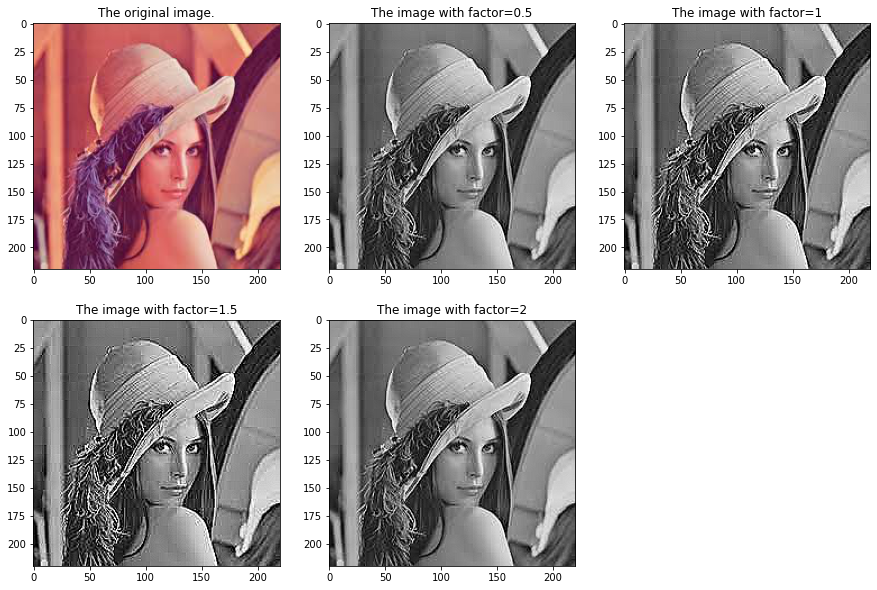

In [12]:
from skimage import filters

#load the image 'lena.jpg'
lena=io.imread('./images/lena.jpg')
#convert it to grayscale
lean_gray=skimage.color.rgb2gray(lena)

#from the source code on github we can find more detaied information
"""
laplace(image, ksize=3, mask=None)
Find the edges of an image using the Laplace operator.
Parameters
----------
image : ndarray
    Image to process.
ksize : int, optional
    Define the size of the discrete Laplacian operator such that it will have a size of (ksize,) * image.ndim.
mask : ndarray, optional
    An optional mask to limit the application to a certain area.Note that pixels surrounding masked regions are also masked to prevent masked regions from affecting the result.

Returns
-------
output : ndarray
    The Laplace edge map.
"""

#Through changing the ksize to change the sizes of the kernel.
#perform sharpening spatial filtering to enhance the image with different parameters
#lena_ksize_3=skimage.filters.laplace(lean_gray,ksize=3,mask=None)
#lena_ksize_5=skimage.filters.laplace(lean_gray,ksize=4,mask=None)
#lena_ksize_7=skimage.filters.laplace(lean_gray,ksize=5,mask=None)
#lena_ksize_9=skimage.filters.laplace(lean_gray,ksize=6,mask=None)
#lena_ksize_11=skimage.filters.laplace(lean_gray,ksize=7,mask=None)


# Clip values to the range [-1, 1]
#lena_ksize_3 = np.clip(lena_ksize_3, -1, 1)
#lena_ksize_5 = np.clip(lena_ksize_5, -1, 1)
#lena_ksize_7 = np.clip(lena_ksize_7, -1, 1)
#lena_ksize_9 = np.clip(lena_ksize_9, -1, 1)
#lena_ksize_11 = np.clip(lena_ksize_11, -1, 1)

# Map values from [-1, 1] to [0, 1]
#lena_ksize_3 = (lena_ksize_3 + 1) / 2
#lena_ksize_5 = (lena_ksize_5 + 1) / 2
#lena_ksize_7 = (lena_ksize_7 + 1) / 2
#lena_ksize_9 = (lena_ksize_9 + 1) / 2
#lena_ksize_11 = (lena_ksize_11 + 1) / 2

# Convert laplace filter outputs to uint8 data type
#lena_ksize_3 = skimage.img_as_ubyte(lena_ksize_3)
#lena_ksize_5 = skimage.img_as_ubyte(lena_ksize_5)
#lena_ksize_7 = skimage.img_as_ubyte(lena_ksize_7)
#lena_ksize_9 = skimage.img_as_ubyte(lena_ksize_9)
#lena_ksize_11 = skimage.img_as_ubyte(lena_ksize_11)


#lena_ksize_3=skimage.color.gray2rgb(lena_ksize_3)
#lena_ksize_5=skimage.color.gray2rgb(lena_ksize_5)
#lena_ksize_7=skimage.color.gray2rgb(lena_ksize_7)
#lena_ksize_9=skimage.color.gray2rgb(lena_ksize_9)
#lena_ksize_11=skimage.color.gray2rgb(lena_ksize_11)

#display the images in the same figure with sub-figures.Add the corresponding title to the sub-figure
#plt.figure(figsize=(15,10))

##subplot=plt.subplot(2,3,1)
#plt.imshow(lena)
#subplot.set_title('The original image.')

#subplot=plt.subplot(2,3,2)
#plt.imshow(lena_ksize_3)
#subplot.set_title('The image with ksize=3')

#subplot=plt.subplot(2,3,3)
#plt.imshow(lena_ksize_5)
#subplot.set_title('The image with ksize=5')

#subplot=plt.subplot(2,3,4)
#plt.imshow(lena_ksize_7)
#subplot.set_title('The image with ksize=7')

#subplot=plt.subplot(2,3,5)
#plt.imshow(lena_ksize_9)
#subplot.set_title('The image with ksize=9')

#subplot=plt.subplot(2,3,6)
#plt.imshow(lena_ksize_11)
#subplot.set_title('The image with ksize=11')\


#Through changing the factor to change the sharpening scope
# Define a sharpening factor
sharpening_factor = [0.5,1,1.5,2]
#define the result list
sharpened=[]

for factor in sharpening_factor:
    # Perform sharpening spatial filtering to enhance the image with different parameters
    sharpened_img = factor * filters.laplace(lean_gray) + lean_gray
    # Clip values to the range [0, 1] and append to the result list
    sharpened.append(sharpened_img.clip(0, 1))

#convert the image back to rgb mode
sharpened[0]=skimage.color.gray2rgb(sharpened[0])
sharpened[1]=skimage.color.gray2rgb(sharpened[1])
sharpened[2]=skimage.color.gray2rgb(sharpened[2])
sharpened[3]=skimage.color.gray2rgb(sharpened[3])

#Diplay the images
plt.figure(figsize=(15,10))

subplot=plt.subplot(2,3,1)
plt.imshow(lena)
subplot.set_title('The original image.')

subplot=plt.subplot(2,3,2)
plt.imshow(sharpened[0])
subplot.set_title('The image with factor=0.5')

subplot=plt.subplot(2,3,3)
plt.imshow(sharpened[1])
subplot.set_title('The image with factor=1')

subplot=plt.subplot(2,3,4)
plt.imshow(sharpened[2])
subplot.set_title('The image with factor=1.5')

subplot=plt.subplot(2,3,5)
plt.imshow(sharpened[0])
subplot.set_title('The image with factor=2')

### (8)	Face Detection and Processing with OpenCV. (``Bonus Practice``)
Load the image 'exp2_7.jpg'. 

(a) The face region is detected and marked with a <font style="color:green;">green</font></center> rectangle.(Tips: You may use``cv2.CascadeClassifier``, or ``cv2.dnn.readNetFromCaffe``, or [``MTCNN``](https://github.com/timesler/facenet-pytorch))

(b) Perform Gaussian smoothing filtering for the background region. Some examples of the generated results are shown in the figure below.
 
![result1](./images/exp2_7_1.png) 
<center><font style="color:red;">** Figure 1. The result of cv2.CascadeClassifier ** </font></center>

![result2](./images/exp2_7_2.png) 
<center><font style="color:red;">** Figure 2. The result of cv2.dnn.readNetFromCaffe ** </font></center>

![result3](./images/exp2_7_3.png) 
<center><font style="color:red;">** Figure 3. The result of MTCNN ** </font></center>

Text(0.5, 1.0, 'Figure 3. The result of MTCNN')

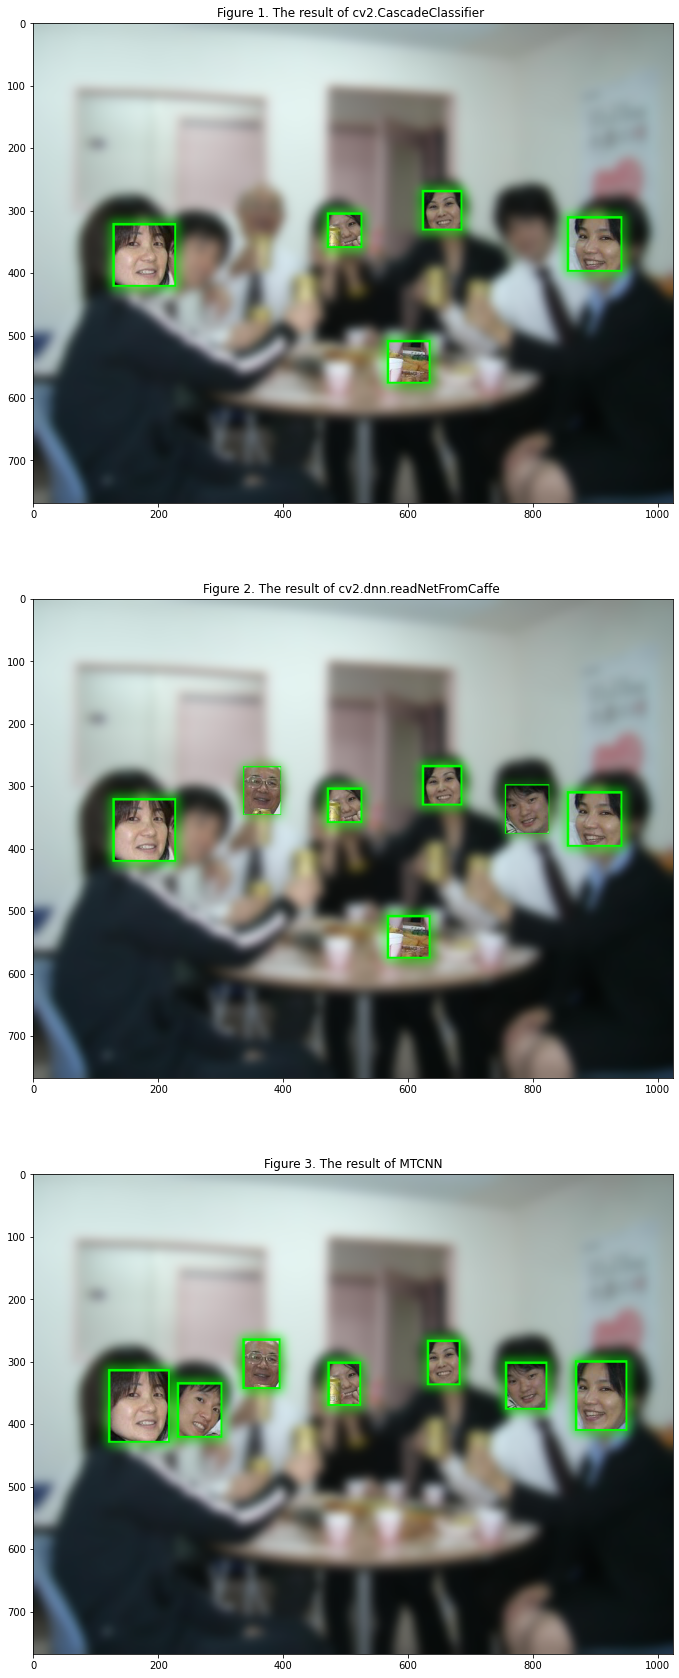

In [54]:
#!pip install facenet-pytorch
import cv2
from skimage import io
import numpy as np
from matplotlib import pyplot as plt
from facenet_pytorch import MTCNN

# Load the image
exp = io.imread('./images/exp2_7.jpg')

# Convert the image to BGR format
exp_bgr = cv2.cvtColor(exp, cv2.COLOR_RGB2BGR)

#usage of cv2.CascadeClassifier
"""Through searching on the Internet we can know that:
1.We should prepare the feature classifier in Haar,which is a xml file named "haarcascade_frontalface_default.xml"
2.There are many feature classifiers for detection, which is named according to their different detected parts. For example,"haarcascade_frontalface_default.xml" is a face detection classifier.
3.We load the feature classifier through cv2.CascadeClassifier function.
"""

# Load the pre-trained face cascade classifier
cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
cascade = cv2.CascadeClassifier(cascade_path)

"""
cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
-----------------------------------------------------------------------------------
image:the image to be detected
scaleFactor:In two consecutive scans, the scale coefficient of the search window is searched. The default is 1.1, that is, the search window is expanded by 10% each time.
minNeighbors:The minimum number of adjacent rectangles that constitute the detection target (default is 3).
minSize:Limit the range of the resulting target area.
"""
# Detect faces in the image
faces = cascade.detectMultiScale(exp_bgr, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw green rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(exp_bgr, (x, y), (x+w, y+h), (0, 255, 0), 5)

# Create a mask for the face region
mask = np.zeros_like(exp_bgr[:, :, 0])
for (x, y, w, h) in faces:
    mask[y:y+h, x:x+w] = 255

# Apply Gaussian blur to the background
blurred_background = cv2.GaussianBlur(exp_bgr, (51, 51), 0)

"""
There are two usages of np.where:
1.np.where(condition,x,y):If the condition is met, x is output; if the condition is not met, y is output.
----------------------------------------------------------------------------------------------------------------------------
2.np.where(condition):outputs the coordinates of the element that satisfies the condition(equivalent to numpy.nonzero). 
                      The coordinates here are given in the form of a tuple. 
                      Usually, the output tuple contains several arrays, corresponding to the coordinates of each dimension of the elements that meet the conditions.
"""
# Copy the original image and apply the mask to keep the face region clear
output = np.where(mask[:, :, np.newaxis] == 255, exp_bgr, blurred_background)

# Convert the image back to RGB format
exp_detected = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# Display the image with detected faces and blurred background
plt.figure(figsize=(30, 30))
subplot=plt.subplot(3,1,1)
plt.imshow(exp_detected)
subplot.set_title('Figure 1. The result of cv2.CascadeClassifier ')


##################################################################################################################################

#usage of cv2.dnn.readNetFromCaffe 
# Load the pre-trained Caffe model for face detection
prototxt_path = './models/deploy.prototxt'
caffemodel_path = './models/res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt_path, caffemodel_path)

"""
blob = cv2.dnn.blobFromImage(img,
                             scalefactor=scale,
                             size=input_shape,
                             mean=mean,
                             swapRB=True)
"""
# Convert the image to blob format
blob = cv2.dnn.blobFromImage(cv2.resize(exp_bgr, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

# Set the input to the network
net.setInput(blob)

# Perform face detection
detections = net.forward()

# Draw green rectangles around the detected faces
for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    # Filter out weak detections by ensuring the confidence is greater than the minimum confidence
    # set the threshold to be 0.8
    if confidence > 0.8:  
        # Compute the (x, y)-coordinates of the bounding box for the object
        box = detections[0, 0, i, 3:7] * np.array([exp_bgr.shape[1], exp_bgr.shape[0], exp_bgr.shape[1], exp_bgr.shape[0]])
        (startX, startY, endX, endY) = box.astype("int")

        # Draw a green rectangle around the face
        cv2.rectangle(exp_bgr, (startX, startY), (endX, endY), (0, 255, 0), 2)
        
        # Update the mask
        mask[startY:endY, startX:endX] = 255

# Apply Gaussian blur to the background outside the face regions
blurred_background = cv2.GaussianBlur(exp_bgr, (51, 51), 0)
blurred_output = np.where(mask[:, :, np.newaxis] == 255, exp_bgr, blurred_background)  

# Convert the image back to RGB format
exp_detected2 = cv2.cvtColor(blurred_output, cv2.COLOR_BGR2RGB)

# Display the image with detected faces
subplot=plt.subplot(3,1,2)
plt.imshow(exp_detected2)
subplot.set_title('Figure 2. The result of cv2.dnn.readNetFromCaffe ')

################################################################################################################################

#usage of MTCNN
# Initialize MTCNN for face detection
mtcnn = MTCNN()

# Detect faces in the image
boxes, _ = mtcnn.detect(exp)

# Create a mask for the face region
mask = np.zeros_like(exp[:, :, 0])

# Draw green rectangles around the detected faces
if boxes is not None:
    for box in boxes:
        x, y, w, h = box.astype('int')
        cv2.rectangle(exp, (x, y), (w, h), (0, 255, 0), 5)
        mask[y:h,x:w]=255

# Apply Gaussian blur to the background outside the face regions
blurred_background = cv2.GaussianBlur(exp, (51, 51), 0)
blurred_output= np.where(mask[:,:,np.newaxis] == 255,exp,blurred_background)

# Display the result
subplot=plt.subplot(3,1,3)
plt.imshow(blurred_output)
plt.title('Figure 3. The result of MTCNN')

### (9)	Face Detection with Laptop Camera. (``Bonus Practice``)
(a) Load video stream from the laptop camera.

(b) Use a face detection model to detect images captured by the camera.

(c) Mark the face region with a <font style="color:green;">green</font></center> rectangle to achieve real-time detection as good as possible.

(d) Perform Gaussian smoothing filtering for the background region.

In [76]:
import cv2

# Load the pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load video stream from the laptop camera
# Initialize the laptop camera
video_capture = cv2.VideoCapture(0)

# Define the duration for capturing video (in seconds)
capture_duration = 10

# Define the start time
start_time = time.time()

# Define the output video file name
output_video_filename = 'output_video.avi'

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_video_filename, fourcc, 20.0, (640, 480))

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    # Check if the frame was captured successfully
    if not ret:
        print("Failed to capture frame. Exiting...")
        break

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    #Use a face detection model to detect images captured by the camera
    # Perform face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Create a mask to keep the face region clear
    mask = np.zeros_like(frame[:, :, 0])
    for (x, y, w, h) in faces:
        cv2.rectangle(mask, (x, y), (x+w, y+h), (255), -1)

    #Perform Gaussian smoothing filtering for the background region
    # Apply Gaussian blur to the background using the mask
    blurred_background = cv2.GaussianBlur(frame, (51, 51), 0)
    blurred_output = frame.copy()
    blurred_output[mask != 255] = blurred_background[mask != 255]

    #Mark the face region with a green rectangle to achieve real-time detection as good as possible
    # Draw green rectangles around the detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(blurred_output, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Write the frame to the output video file
    out.write(blurred_output)

    # Display the resulting frame
    cv2.imshow('Face Detection', blurred_output)

    # Check if the specified duration has elapsed
    if time.time() - start_time > capture_duration:
        print("Capturing video completed. Exiting...")
        break

    # Check for key press to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object, VideoWriter object, and close all windows
video_capture.release()
out.release()
cv2.destroyAllWindows()

## 3.	Requirements of Experiment Report ##
#### (1) Use the Jupyter Notebook to write and test codes. 
#### (2) Display the results in the Jupyter Notebook.
#### (3) Sumbit the report according to the template including the corresponding codes and results. 
#### (4) The report is required to be tidy with clear procedures.
#### (5) The codes should be concise and give some necessary comments.